In [99]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
path = str(Path(Path('File.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
from collections import namedtuple

#from Plot_tools import *
from File_tools import *

import pickle

_nthreads = 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
# # FV3 test run

in_dir  = "/scratch/larissa.reames/ideal_updrafts"
out_dir = "/work/wicker/CAM_analysis_tools"
shear   = "shallow_12.5"

c1500 = read_model_fields(str(os.path.join(in_dir, "FV3_SOLO_C1500_kess",shear)), filename='atmos_hifreq.nc', model_type='fv3_solo', printout=False, precip=False, condensate=True)
c2000 = read_model_fields(str(os.path.join(in_dir, "FV3_SOLO_C2000_kess",shear)), filename='atmos_hifreq.nc', model_type='fv3_solo', printout=False, precip=False, condensate=True)
c2500 = read_model_fields(str(os.path.join(in_dir, "FV3_SOLO_C2500_kess",shear)), filename='atmos_hifreq.nc', model_type='fv3_solo', printout=False, precip=False, condensate=True)
c3000 = read_model_fields(str(os.path.join(in_dir, "FV3_SOLO_C3000_kess",shear)), filename='atmos_hifreq.nc', model_type='fv3_solo', printout=False, precip=False, condensate=True)
c3500 = read_model_fields(str(os.path.join(in_dir, "FV3_SOLO_C3500_kess",shear)), filename='atmos_hifreq.nc', model_type='fv3_solo', printout=False, precip=False, condensate=True)


fnames = ["c1500", "c2000", "c2500", "c3000", "c3500"]
for n, name in enumerate([c1500, c2000, c2500, c3000, c3500]):
    with open('solo_3D_%s.pkl' % fnames[n], 'wb') as f:
        pickle.dump(name, f)
        
del(c1500)
del(c2000)
del(c2500)
del(c3000)
del(c3500)


Reading:  /scratch/larissa.reames/ideal_updrafts/FV3_SOLO_C1500_kess/shallow_12.5/atmos_hifreq.nc 
Reading:  /scratch/larissa.reames/ideal_updrafts/FV3_SOLO_C2000_kess/shallow_12.5/atmos_hifreq.nc 
Reading:  /scratch/larissa.reames/ideal_updrafts/FV3_SOLO_C2500_kess/shallow_12.5/atmos_hifreq.nc 
Reading:  /scratch/larissa.reames/ideal_updrafts/FV3_SOLO_C3000_kess/shallow_12.5/atmos_hifreq.nc 
Reading:  /scratch/larissa.reames/ideal_updrafts/FV3_SOLO_C3500_kess/shallow_12.5/atmos_hifreq.nc 


In [148]:
# WRF test run

in_dir  = "/scratch/larissa.reames/ideal_updrafts"
out_dir = "/work/wicker/CAM_analysis_tools"
shear   = "shallow_12.5"

c1500 = read_model_fields(str(os.path.join(in_dir, "WRF_C1500_kess",shear)), model_type='wrf', printout=False, precip=False, condensate=True)
c2000 = read_model_fields(str(os.path.join(in_dir, "WRF_C2000_kess",shear)), model_type='wrf', printout=False, precip=False, condensate=True)
c2500 = read_model_fields(str(os.path.join(in_dir, "WRF_C2500_kess",shear)), model_type='wrf', printout=False, precip=False, condensate=True)
c3000 = read_model_fields(str(os.path.join(in_dir, "WRF_C3000_kess",shear)), model_type='wrf', printout=False, precip=False, condensate=True)
c3500 = read_model_fields(str(os.path.join(in_dir, "WRF_C3500_kess",shear)), model_type='wrf', printout=False, precip=False, condensate=True)

fnames = ["c1500", "c2000", "c2500", "c3000", "c3500"]
for n, name in enumerate([c1500, c2000, c2500, c3000, c3500]):
    with open('wrf_3D_%s.pkl' % fnames[n], 'wb') as f:
        pickle.dump(name, f)

del(c1500)
del(c2000)
del(c2500)
del(c3000)
del(c3500)


In [152]:
# #CM1 run

in_dir  = '/scratch/wicker/cm1r20.3/run'
output_dir = './'
shear   = "shallow_12.5"

c1500 = read_model_fields(str(os.path.join(in_dir, "squall_c1500_kess")), model_type='cm1', printout=False, precip=False, condensate=True)
c2000 = read_model_fields(str(os.path.join(in_dir, "squall_c2000_kess")), model_type='cm1', printout=False, precip=False, condensate=True)
c2500 = read_model_fields(str(os.path.join(in_dir, "squall_c2500_kess")), model_type='cm1', printout=False, precip=False, condensate=True)
c3000 = read_model_fields(str(os.path.join(in_dir, "squall_c3000_kess")), model_type='cm1', printout=False, precip=False, condensate=True)
c3500 = read_model_fields(str(os.path.join(in_dir, "squall_c3500_kess")), model_type='cm1', printout=False, precip=False, condensate=True)

fnames = ["c1500", "c2000", "c2500", "c3000", "c3500"]
for n, name in enumerate([c1500, c2000, c2500, c3000, c3500]):
    with open('cm1_3D_%s.pkl' % fnames[n], 'wb') as f:
        pickle.dump(name, f)
        
del(c1500)
del(c2000)
del(c2500)
del(c3000)
del(c3500)


In [153]:
fnames = ["c1500", "c2000", "c2500", "c3000", "c3500"]
fnames = ["c3500"]

cm1  = pickle2Obj('cm1_3D_%s.pkl' % fnames[0], retObj=True)
wrf  = pickle2Obj('wrf_3D_%s.pkl' % fnames[0], retObj=True)
solo = pickle2Obj('solo_3D_%s.pkl' % fnames[0], retObj=True)

cm1_var = cm1.cond[...]
print(cm1_var.shape)
print("CM1 Max:  %g10.6" % cm1_var.max())
wrf_var = wrf.cond[...]
print(wrf_var.shape)
print("WRF Max:  %g10.6" % wrf_var.max())
solo_var = solo.cond[...]
print(solo_var.shape)
print("SOL Max:  %g10.6" % solo_var.max())


(25, 60, 256, 256)
CM1 Max:  0.0091277810.6
(25, 60, 256, 256)
WRF Max:  0.0086931710.6
(24, 60, 256, 256)
SOL Max:  0.0094339710.6


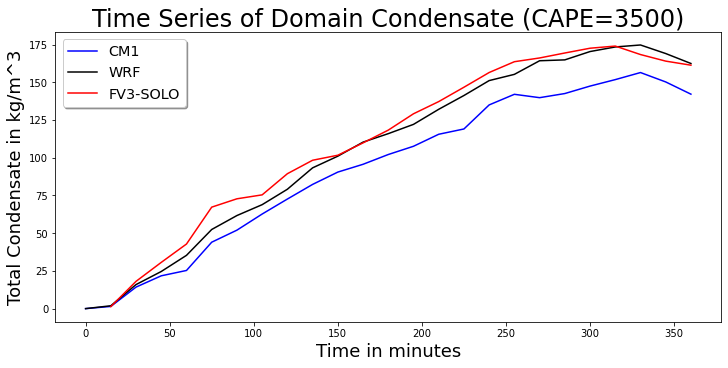

In [154]:
time0 = 15*np.arange(25)
time1 = 15+15*np.arange(24)

fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(10,5))

ax.plot(time0, cm1.cond.sum(axis=(1,2,3)), color='b', linestyle='-', label='CM1')
ax.plot(time0, wrf.cond.sum(axis=(1,2,3)), color='k', linestyle='-', label='WRF')
ax.plot(time1, solo.cond.sum(axis=(1,2,3)), color='r', linestyle='-', label='FV3-SOLO')

legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
ax.set_title('Time Series of Domain Condensate (CAPE=3500)', fontsize=24)
ax.set_xlabel('Time in minutes', fontsize=18)
ax.set_ylabel('Total Condensate in kg/m^3', fontsize=18)

plt.show()


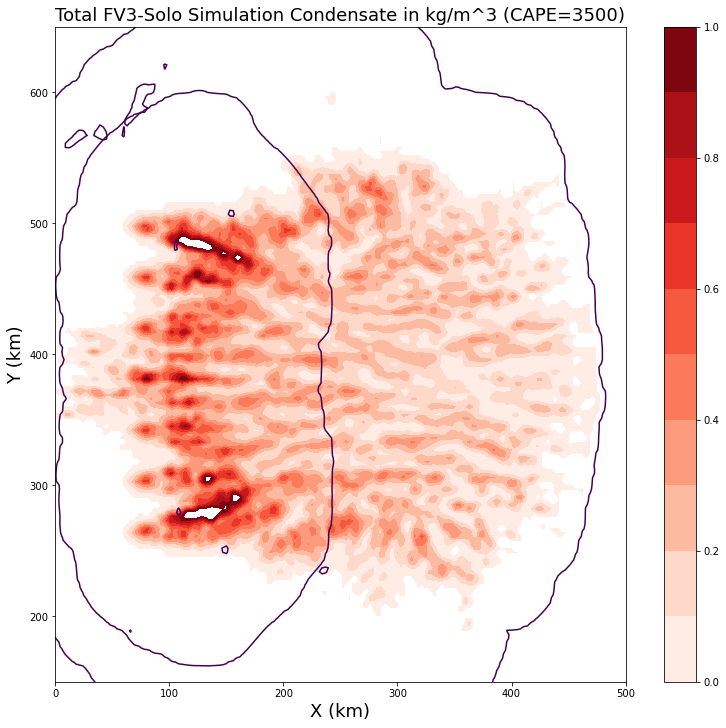

In [157]:
levels = np.linspace(0.0, 1.0, 11)
x = 3*np.arange(256)

plt.rcParams['contour.negative_linestyle'] = 'dashed'

sfld = np.where(solo.cond.sum(axis=(0,1)) < 0.01, -1., solo.cond.sum(axis=(0,1)))

fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(10,10))
cs = plt.contourf(x,x,sfld, levels=levels, cmap="Reds")
plt.contour(x,x,solo.thetap[23,1], levels=[-1.], color='k')
plt.contour(x,x,solo.thetap[11,1], levels=[-1.], color='k')

ax.set_ylabel('Y (km)', fontsize=18)
ax.set_xlabel('X (km)', fontsize=18)
ax.set_title('Total FV3-Solo Simulation Condensate in kg/m^3 (CAPE=3500)', fontsize=18)
ax.set_xlim(0,500)
ax.set_ylim(150,650)
colorbar = plt.colorbar(cs)

plt.show()

#print(solo.thetap[11,1].min())

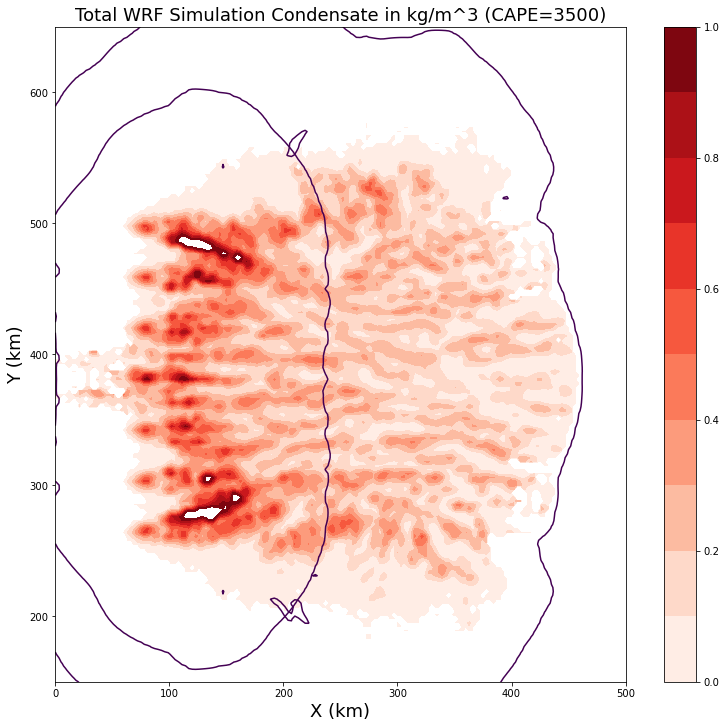

In [160]:
sfld = np.where(wrf.cond.sum(axis=(0,1)) < 0.01, -1., solo.cond.sum(axis=(0,1)))

fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(10,10))
#cs = plt.contourf(x,x,solo.cond.sum(axis=(0,1)), levels=levels, cmap="Reds")
cs = plt.contourf(x,x,sfld, levels=levels, cmap="Reds")
ax.set_ylabel('Y (km)', fontsize=18)
ax.set_xlabel('X (km)', fontsize=18)
ax.set_title('Total WRF Simulation Condensate in kg/m^3 (CAPE=3500)', fontsize=18)
ax.set_xlim(0,500)
ax.set_ylim(150,650)
colorbar = plt.colorbar(cs)
plt.contour(x,x,wrf.thetap[24,1], levels=[-1.], color='k')
plt.contour(x,x,wrf.thetap[12,1], levels=[-1.], color='k')


plt.show()
#print(wrf.thetap[12,1].min())

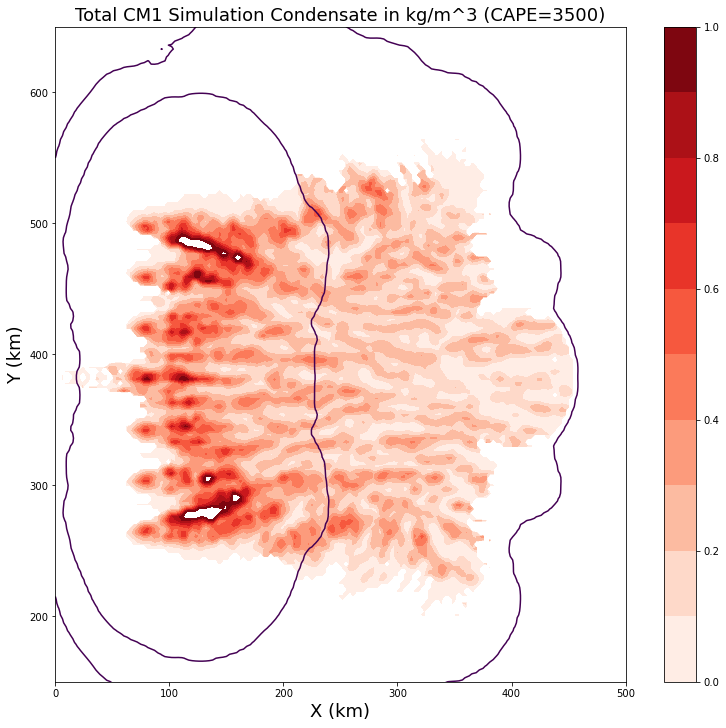

In [161]:
sfld = np.where(cm1.cond.sum(axis=(0,1)) < 0.01, -1., solo.cond.sum(axis=(0,1)))

fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(10,10))
#cs = plt.contourf(x,x,solo.cond.sum(axis=(0,1)), levels=levels, cmap="Reds")
cs = plt.contourf(x,x,sfld, levels=levels, cmap="Reds")
ax.set_ylabel('Y (km)', fontsize=18)
ax.set_xlabel('X (km)', fontsize=18)
ax.set_title('Total CM1 Simulation Condensate in kg/m^3 (CAPE=3500)', fontsize=18)
ax.set_xlim(0,500)
ax.set_ylim(150,650)
colorbar = plt.colorbar(cs)
plt.contour(x,x,cm1.thetap[24,1], levels=[-1.], color='k')
plt.contour(x,x,cm1.thetap[12,1], levels=[-1.], color='k')

plt.show()
#print(cm1.thetap[12,1].min(), cm1.thetap[24,1].min())

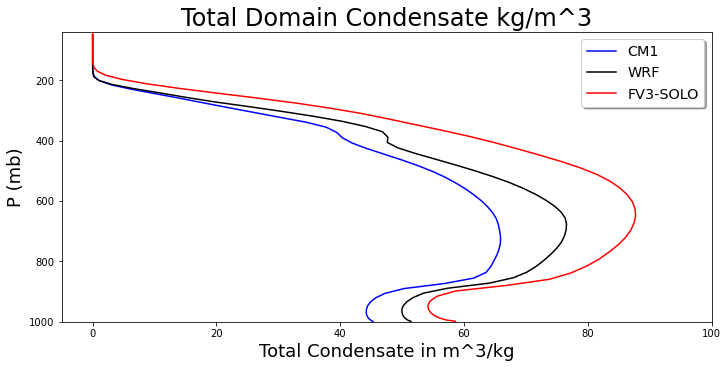

In [165]:
cm1z = cm1.z3d.sum(axis=(0,2,3))
wrfz = wrf.z3d.sum(axis=(0,2,3))
soloz = -solo.z3d.sum(axis=(0,2,3))

cm1p = cm1.pres.mean(axis=(0,2,3))/100.
wrfp = wrf.pres.mean(axis=(0,2,3))/100.
solop = solo.pres.mean(axis=(0,2,3))/100.
# cm1p  = cm1.den.mean(axis=(0,2,3))
# solop = solo.den.mean(axis=(0,2,3))
# wrfp  = wrf.den.mean(axis=(0,2,3))

fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(10,5))

ax.plot(cm1.cond.sum(axis=(0,2,3)), cm1p, color='b', linestyle='-', label='CM1')
ax.plot(wrf.cond.sum(axis=(0,2,3)), wrfp, color='k', linestyle='-', label='WRF')
ax.plot(solo.cond.sum(axis=(0,2,3)), solop, color='r', linestyle='-', label='FV3-SOLO')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
ax.set_title('Total Domain Condensate kg/m^3', fontsize=24)
ax.set_ylabel('P (mb)', fontsize=18)
ax.set_xlabel('Total Condensate in m^3/kg', fontsize=18)
ax.set_ylim(1000,40.)
ax.set_xlim(-5,100)

plt.show()



In [5]:
# WRF output is accumulated precip over whole run - fix that
wrf4_precip = wrf4_acc_prec.copy().reshape((24,256,256))
wrf3_precip = wrf3_acc_prec.copy().reshape((24,256,256))
for n in np.arange(22,0,-1):
    wrf4_precip[n+1] = wrf4_precip[n+1] - wrf4_precip[n]
    wrf3_precip[n+1] = wrf3_precip[n+1] - wrf3_precip[n]

# FV3 QPF is for 5 min intervals - do it for 15 min.
fv3A_total_precip = 3*fv3A_precip.sum(axis=(1,2))
fv3B_total_precip = 3*fv3B_precip.sum(axis=(1,2))

wrf3_total_precip = wrf3_precip.sum(axis=(1,2))
wrf4_total_precip = wrf4_precip.sum(axis=(1,2))

# FV3 QPF is for 5 min intervals - do it for 15 min.
fv3A_cond_total = fv3A_cond.sum(axis=(1,2,3))
fv3B_cond_total = fv3B_cond.sum(axis=(1,2,3))

wrf3_cond_total = wrf3_cond.sum(axis=(1,2,3))
wrf4_cond_total = wrf4_cond.sum(axis=(1,2,3))

time = 15.0 + 15*np.arange(24)

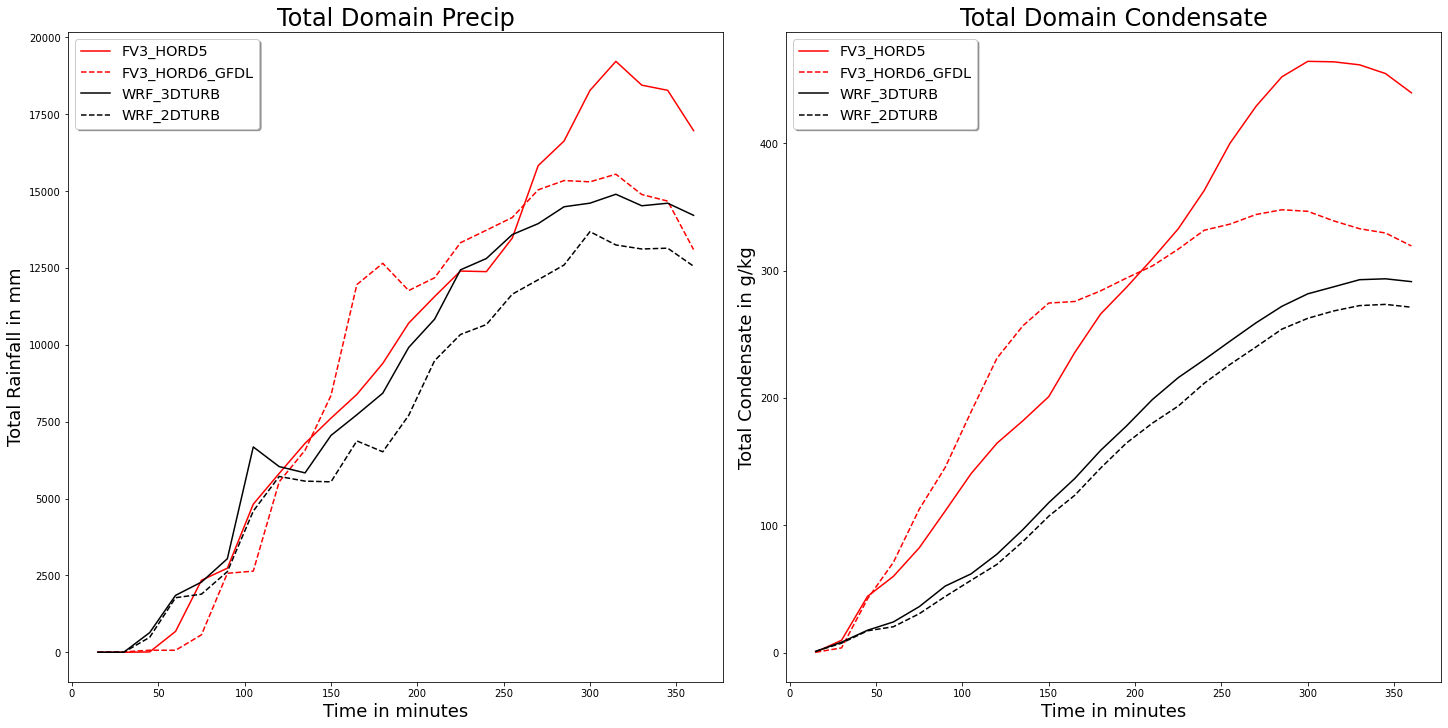

In [6]:
fig, ax = plt.subplots(1,2, constrained_layout=True,figsize=(20,10))

ax[0].plot(time, fv3A_total_precip, color='r', linestyle='-', label='FV3_HORD5')
ax[0].plot(time, fv3B_total_precip, color='r', linestyle='--', label='FV3_HORD6_GFDL')

ax[0].plot(time, wrf3_total_precip, color='k', linestyle='-', label='WRF_3DTURB')
ax[0].plot(time, wrf4_total_precip, color='k', linestyle='--', label='WRF_2DTURB')

legend = ax[0].legend(loc='upper left', shadow=True, fontsize='x-large')
ax[0].set_title('Total Domain Precip', fontsize=24)
ax[0].set_xlabel('Time in minutes', fontsize=18)
ax[0].set_ylabel('Total Rainfall in mm', fontsize=18)

#

ax[1].plot(time, fv3A_cond_total, color='r', linestyle='-', label='FV3_HORD5')
ax[1].plot(time, fv3B_cond_total, color='r', linestyle='--', label='FV3_HORD6_GFDL')

ax[1].plot(time, wrf3_cond_total, color='k', linestyle='-', label='WRF_3DTURB')
ax[1].plot(time, wrf4_cond_total, color='k', linestyle='--', label='WRF_2DTURB')

legend = ax[1].legend(loc='upper left', shadow=True, fontsize='x-large')
ax[1].set_title('Total Domain Condensate', fontsize=24)
ax[1].set_xlabel('Time in minutes', fontsize=18)
ax[1].set_ylabel('Total Condensate in g/kg', fontsize=18)

plt.savefig('SquallLine_precip_cond.png', dpi=300)


In [83]:
plt.savefig('SquallLine_precip_cond.png')

<Figure size 432x288 with 0 Axes>